In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
def rastrigin2(X,Y):
    A = 10
    N = 2
    return A*N + np.power(X,2) - A*np.cos(2*np.pi*X) + np.power(Y,2) - A*np.cos(2*np.pi*Y)

In [4]:
def zero_order(x0, y0, h0, alpha, beta, f):
    points = [(x0,y0)]
    for i in range(10):
        x, y = points[-1]
        dx = f(x+h0,y)-f(x-h0,y)
        dy = f(x,y+h0)-f(x,y-h0)
        new = np.array([x,y])-(alpha/(2*h0))*np.array([dx,dy])
        points.append(tuple(new))
        h0 = beta*h0
    return points

def first_order(x0,y0,alpha,der):
    points = [(x0,y0)]
    for i in range(10):
        x, y = points[-1]
        new = np.array([x,y])- alpha * der(x,y) 
        points.append(tuple(new))
    return points

def rastrigin2der(x,y):
    A = 10
    single = lambda z : 2*z + 2*np.pi*A*np.sin(2*np.pi*z)
    return np.array([single(x), single(y)])

In [5]:
def simulation():
    initials = np.random.uniform(-1.5,1.5, (75,2))
    A = 10
    L = 63.33
    alpha =  1/(4*L)
    beta = 0.95
    h0= 0.15
    zero_points = []
    first_points = []
    for point in initials:
        zero_steps = zero_order(x0 = point[0], y0 = point[1], h0=h0, alpha = alpha, beta = beta, f = rastrigin2)
        first_steps = first_order(x0 = point[0], y0 = point[1] , alpha= alpha , der = rastrigin2der)
        zero_points.append(zero_steps)
        first_points.append(first_steps)
    return ( list(zip(*zero_points)) , list(zip(*first_points)) )

In [6]:
(zero_points, first_points) = simulation()

In [7]:
x = np.linspace(-1.6, 1.6, 100)
y = np.linspace(-1.6, 1.6, 100)

X, Y = np.meshgrid(x, y)
Z = rastrigin2(X,Y)

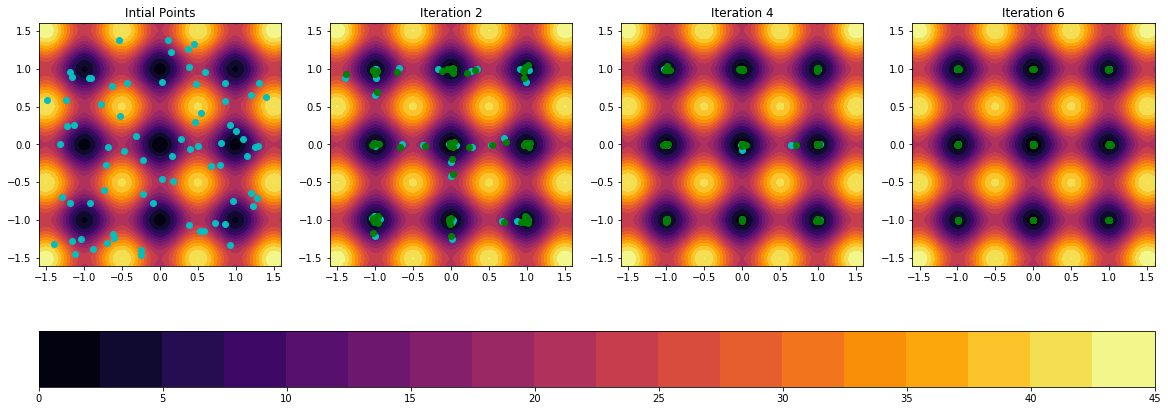

In [8]:
fig, axarr = plt.subplots(1, 4, figsize= (20, 8) )
    
for i, axes in enumerate(axarr.ravel()):
    axes.set(aspect='equal')
    countor = axes.contourf(X,Y,Z,cmap="inferno", levels = 20)
    zero_x, zero_y = zip(*zero_points[2*i])
    axes.scatter(zero_x, zero_y, c = 'c')
    if i >0:
        first_x, first_y = zip(*first_points[2*i])
        axes.scatter(first_x, first_y, c = 'g')
        axes.set_title(f'Iteration {2*i}')
    else:
        axes.set_title('Intial Points')
        
fig.colorbar(countor,orientation = 'horizontal',  ax= axarr.ravel().tolist())

plt.show()
fig.savefig("figures/rastrigin.pdf", bbox_inches='tight')